In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [2]:
# Load data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv(r'C:\Users\Reina\Desktop\demonitization.csv')

In [3]:
# Drop NaN values
train_data = train_data.dropna()
test_data = test_data.dropna()

In [4]:
# Preprocess data
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

In [5]:
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())

    # Remove stopwords and stem remaining words
    stemmed_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]

    # Join stemmed tokens back into a single string
    preprocessed_text = ' '.join(stemmed_tokens)

    return preprocessed_text

In [6]:
train_data['text'] = train_data['text'].apply(preprocess_text)
test_data['Tweet'] = test_data['Tweet'].apply(preprocess_text)

In [7]:
# Extract features
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_data['text'])
X_test = vectorizer.transform(test_data['Tweet'])
y_train = train_data['sentiment']

In [8]:
# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [9]:
# Evaluate model on test data
y_pred = model.predict(X_test)

In [10]:
# Save predictions to a file
test_data['sentiment'] = y_pred
test_data.to_csv('twitter_testing_predictions.csv', index=False)

Text(0.5, 1.0, 'Distribution of sentiments')

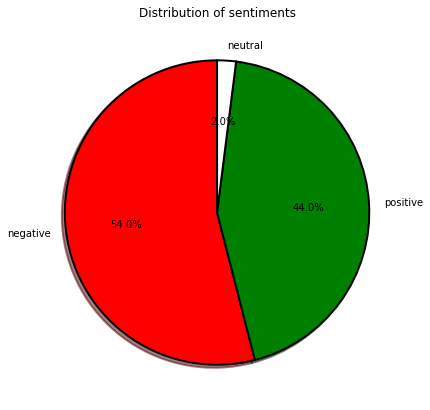

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(7,7))
colors = ("red", "green", "white")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = test_data['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = None, label='')
plt.title('Distribution of sentiments')